<a href="https://colab.research.google.com/github/riyaaaarane/yield-lstm/blob/main/yield_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load data from CSV
df = pd.read_csv("/content/four-features-all-villages - all_data(5 villages) - Copy of mahalingpur_farm_data_dailyagrre (1).csv.csv")

# Convert date column to datetime and set as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Fill missing values with interpolation
df.fillna(method='ffill', inplace=True) # Forward fill
df.fillna(method='bfill', inplace=True) # Backward fill for any remaining NaNs at the beginning

# Display the first few rows and check for nulls
display(df.head())
print("\nMissing values after filling:")
print(df.isnull().sum())

/tmp/ipython-input-276828747.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True) # Forward fill
/tmp/ipython-input-276828747.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True) # Backward fill for any remaining NaNs at the beginning


precipitation_mm  temperature_C        lai      fapar   yield  \
date                                                                        
2007-01-01               0.0      30.035635  11.029443  54.285325  108.25   
2007-01-02               0.0      29.799342  11.143477  54.562126  108.25   
2007-01-03               0.0      29.572417  11.257510  54.838927  108.25   
2007-01-04               0.0      30.142984  11.371544  55.115728  108.25   
2007-01-05               0.0      29.417248  11.485578  55.392530  108.25   

                village  
date                     
2007-01-01  mahalingpur  
2007-01-02  mahalingpur  
2007-01-03  mahalingpur  
2007-01-04  mahalingpur  
2007-01-05  mahalingpur


Missing values after filling:
precipitation_mm    0
temperature_C       0
lai                 0
fapar               0
yield               0
village             0
dtype: int64


In [ ]:
df.shape

(10960, 6)

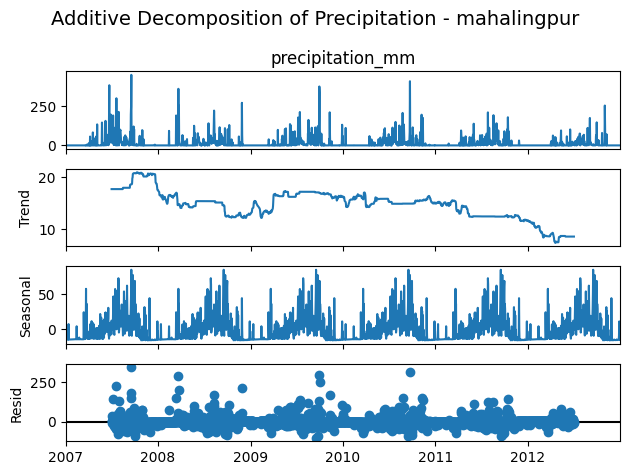

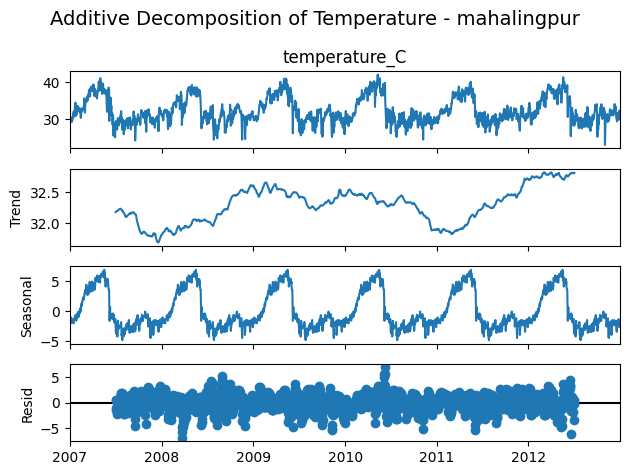

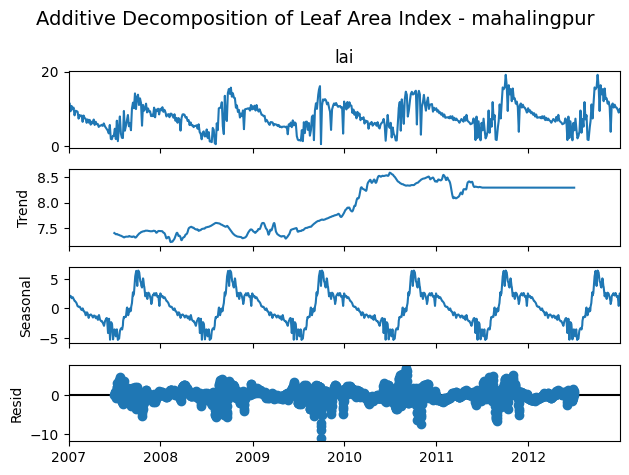

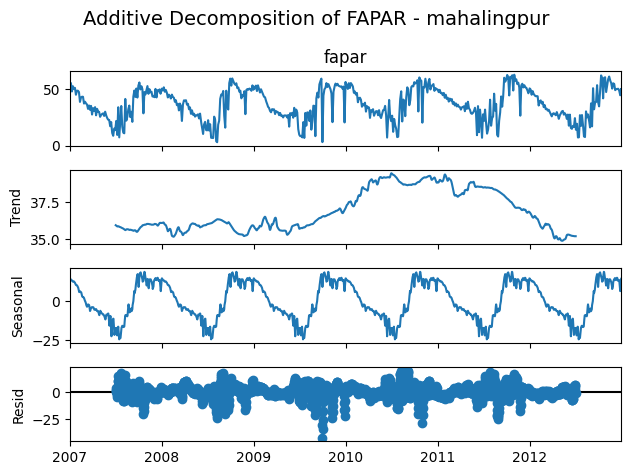

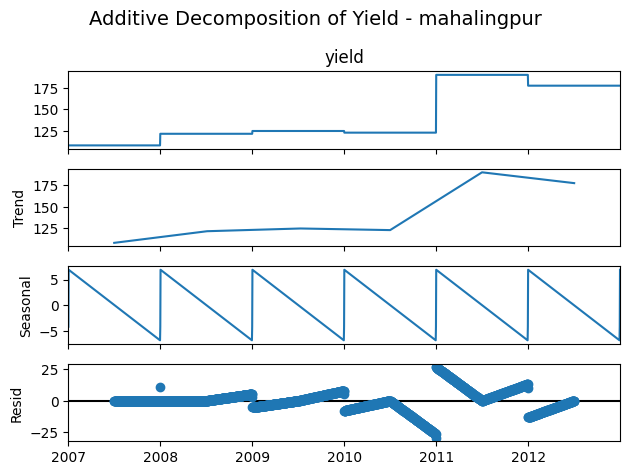

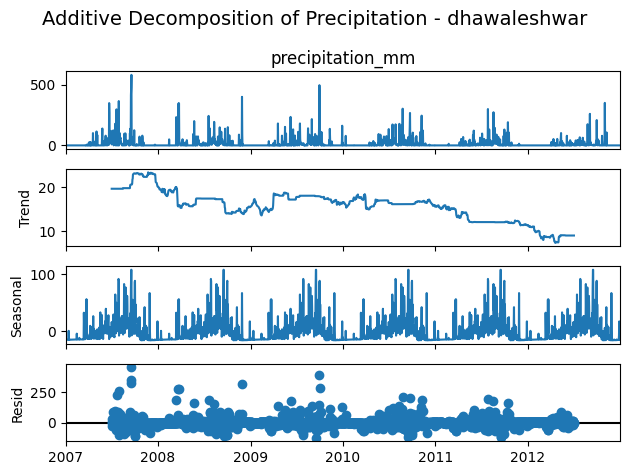

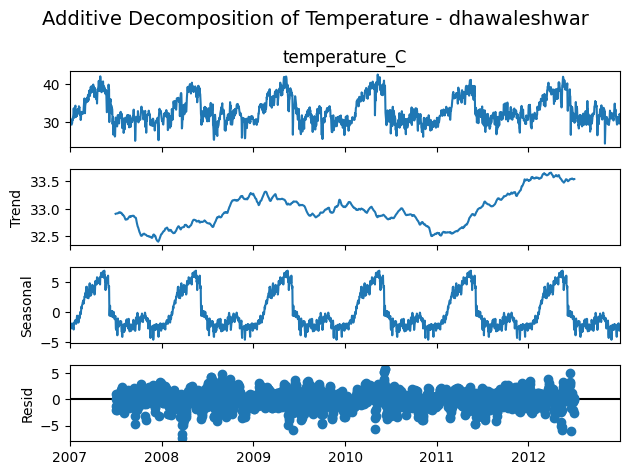

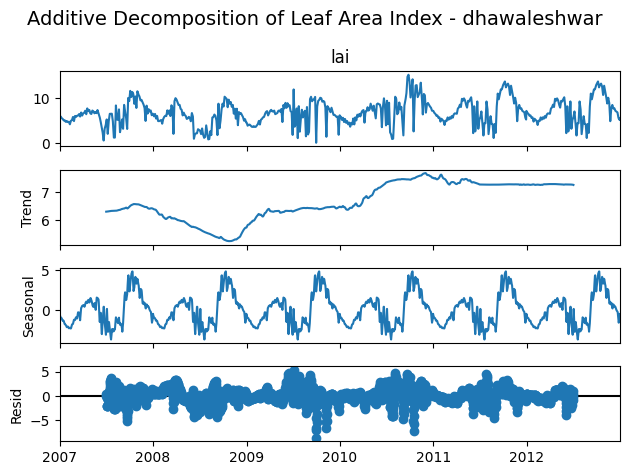

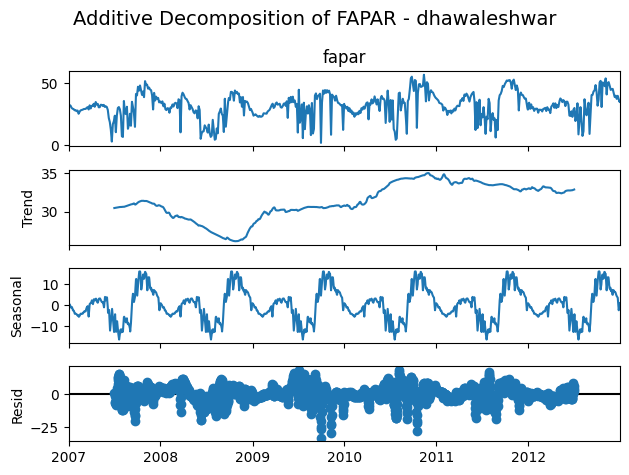

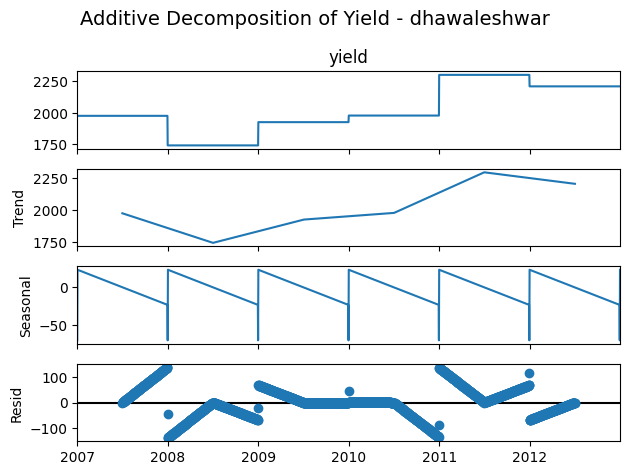

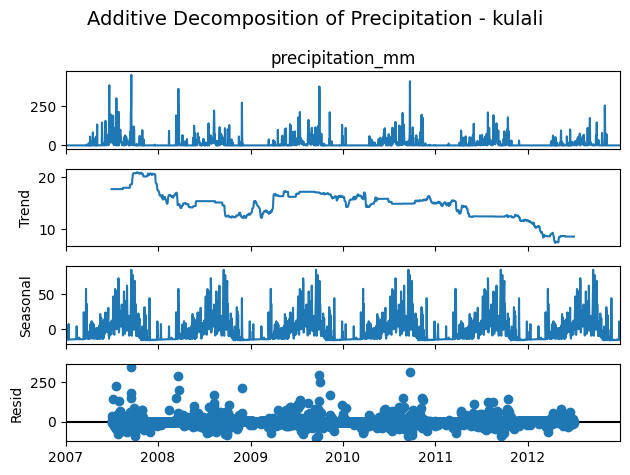

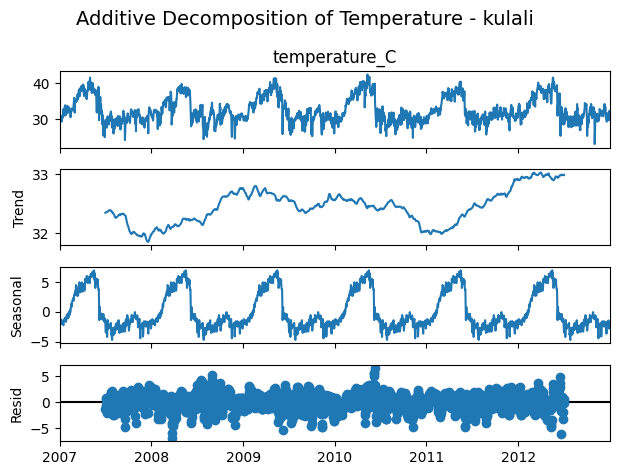

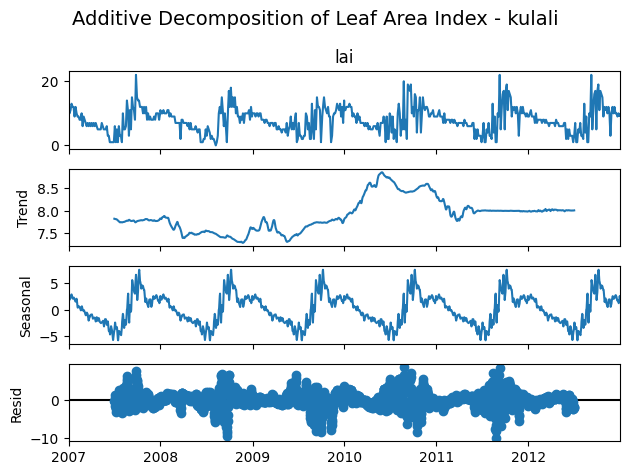

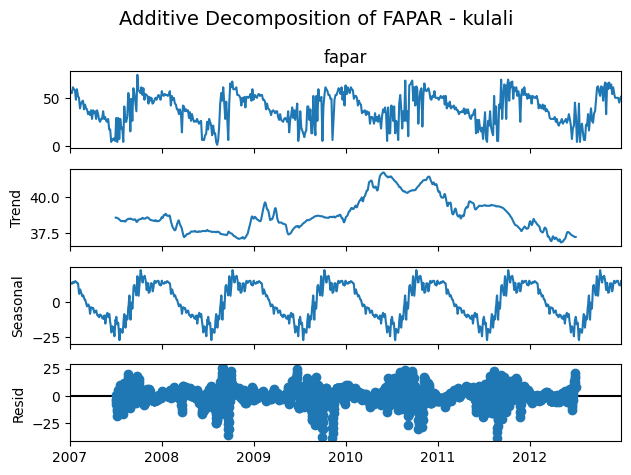

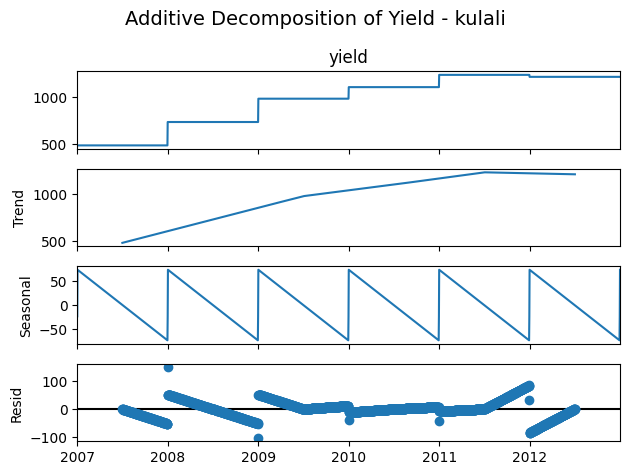

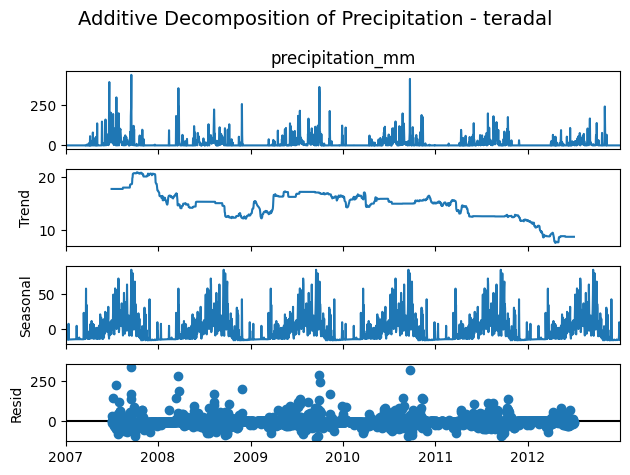

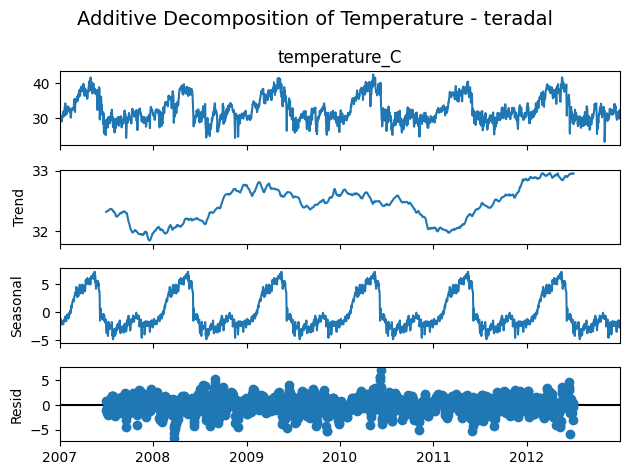

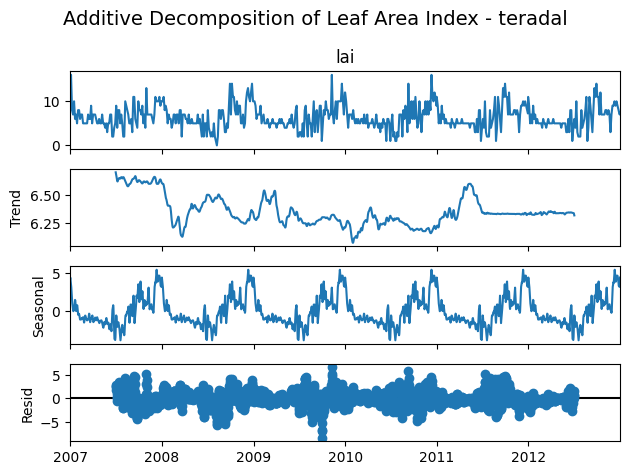

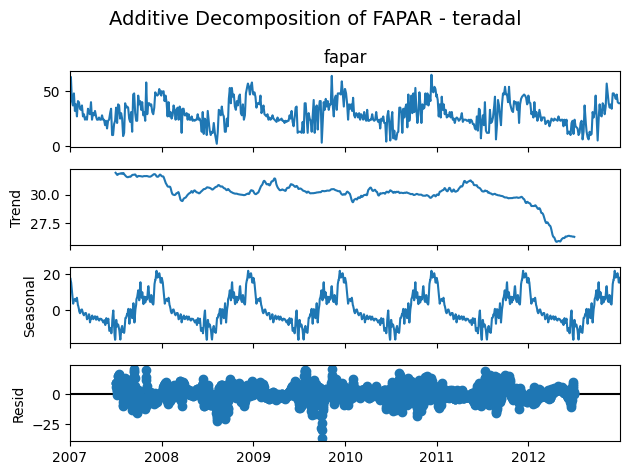

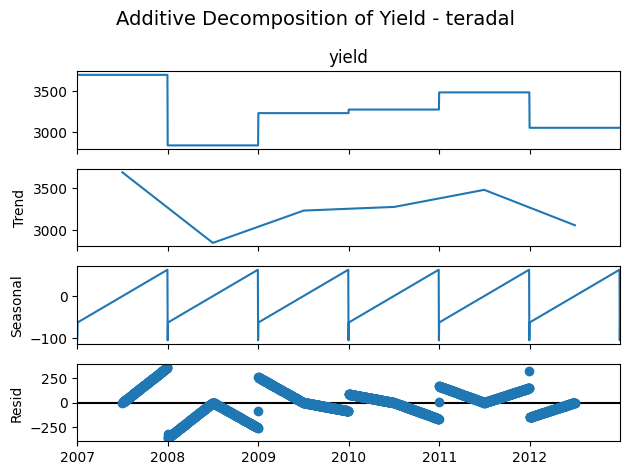

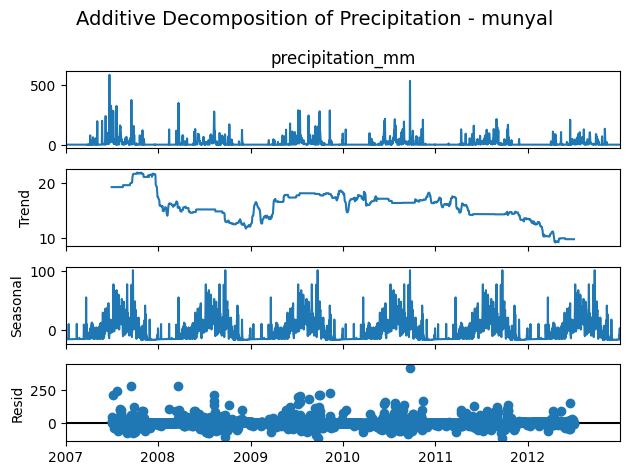

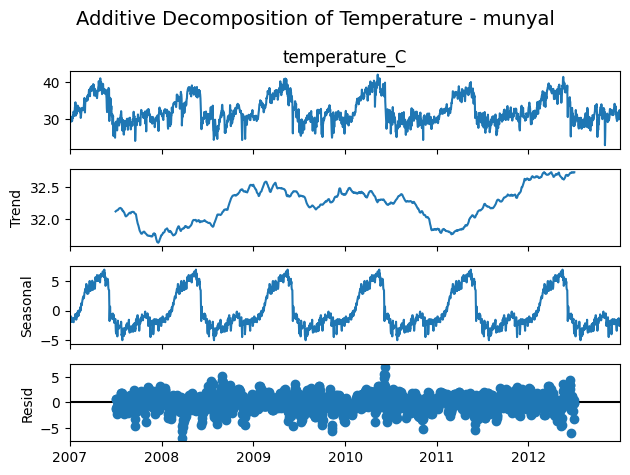

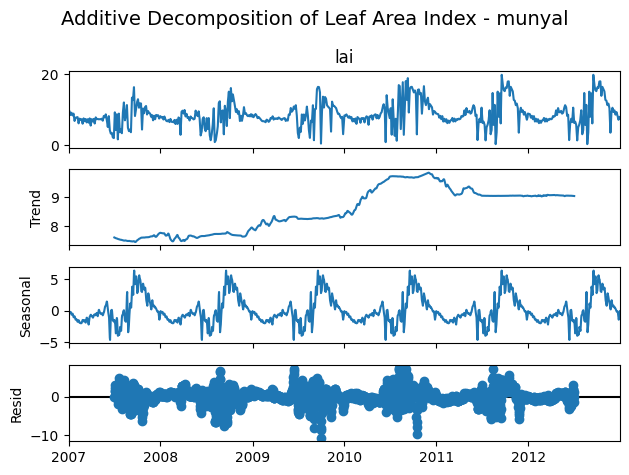

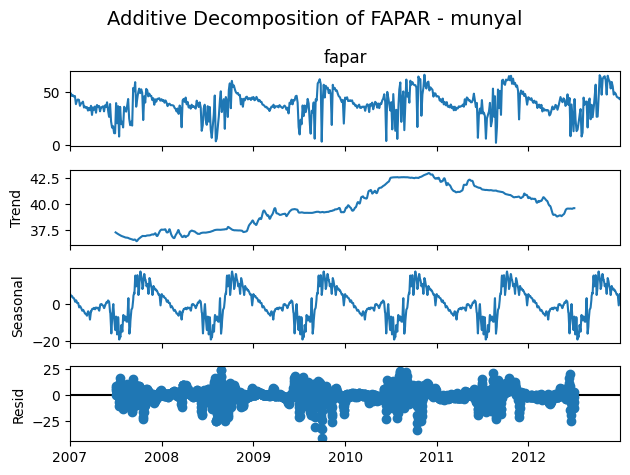

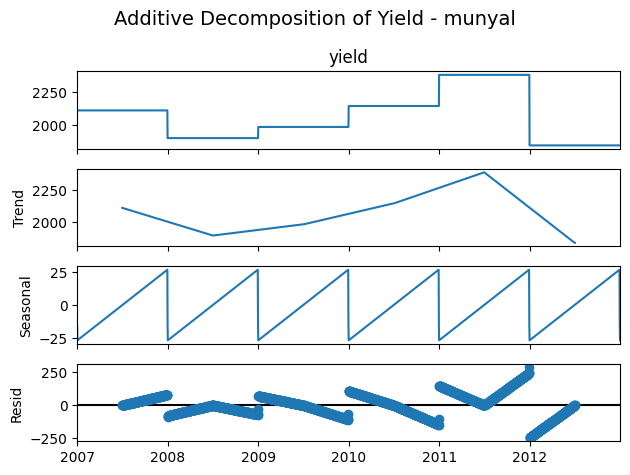

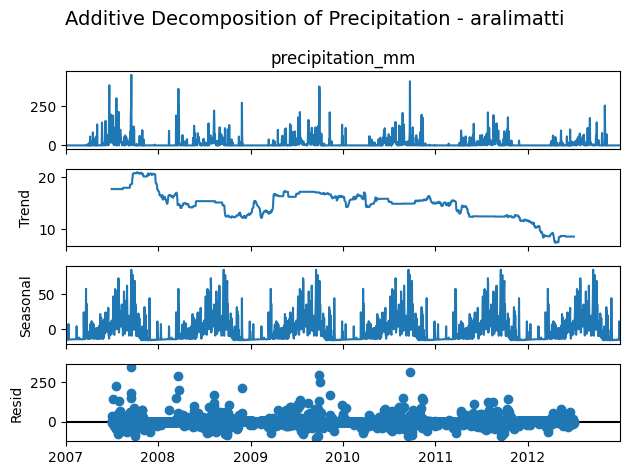

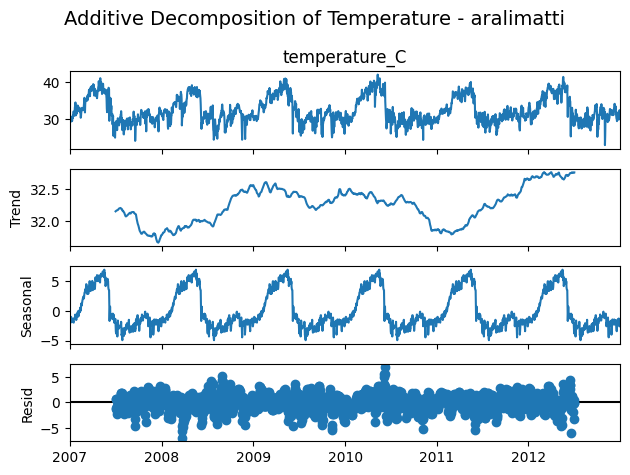

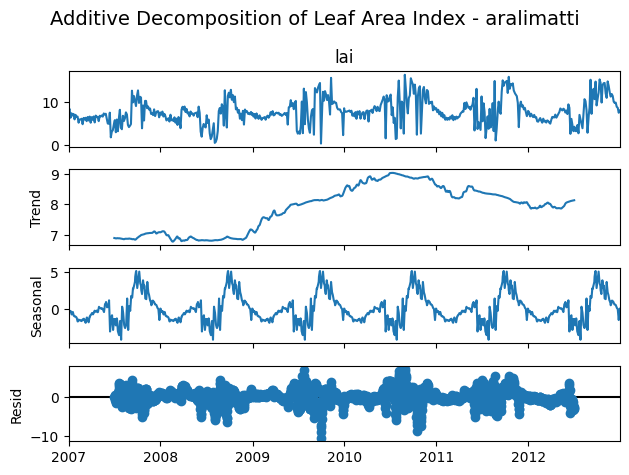

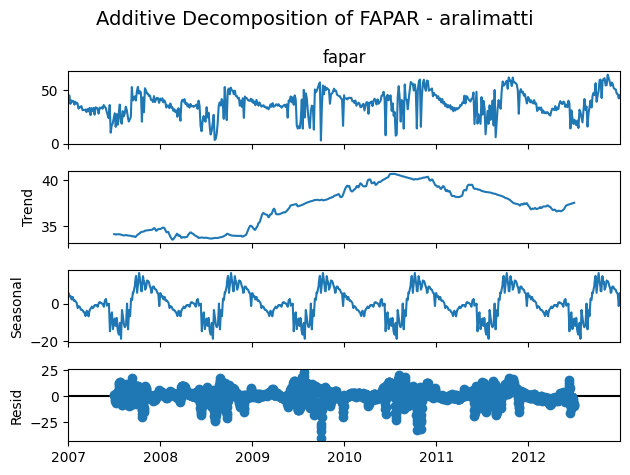

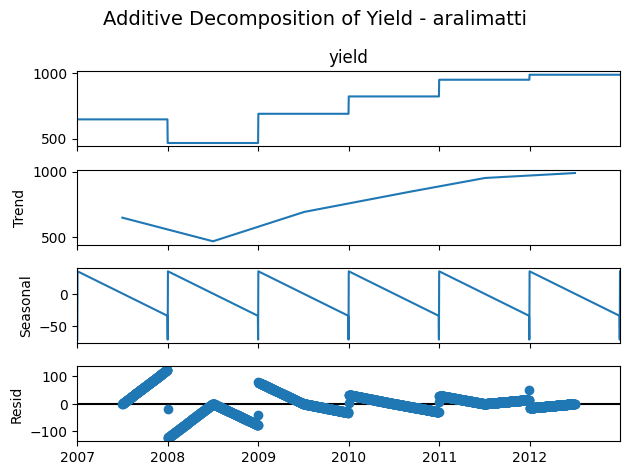

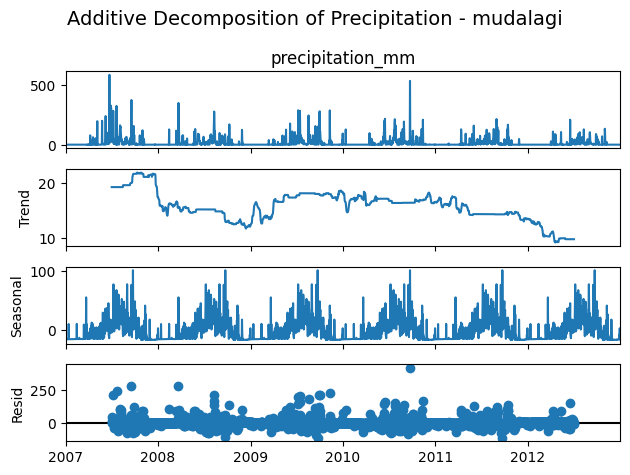

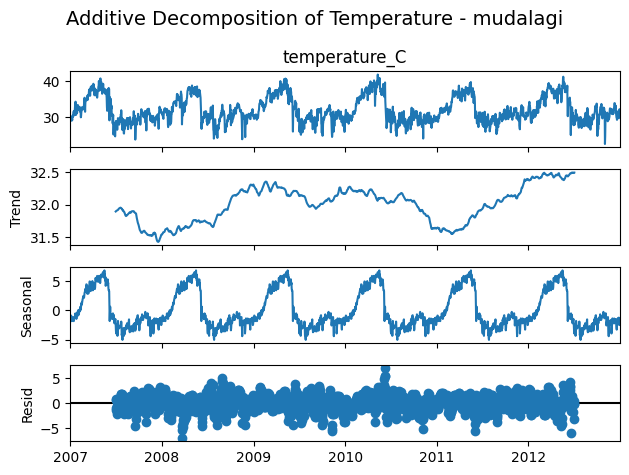

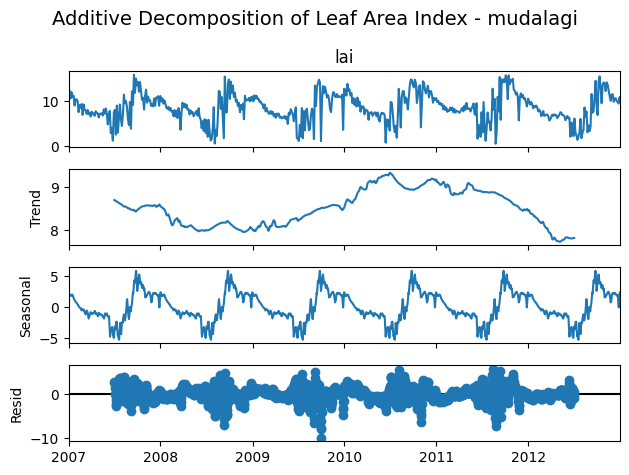

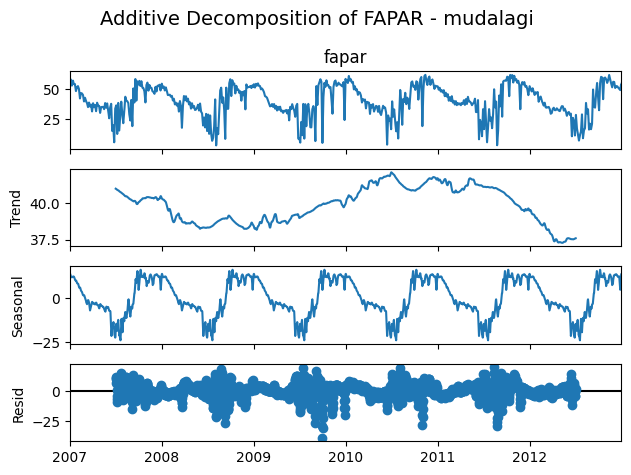

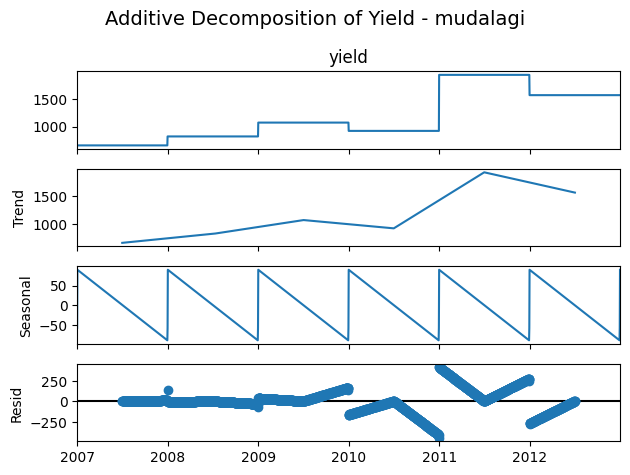

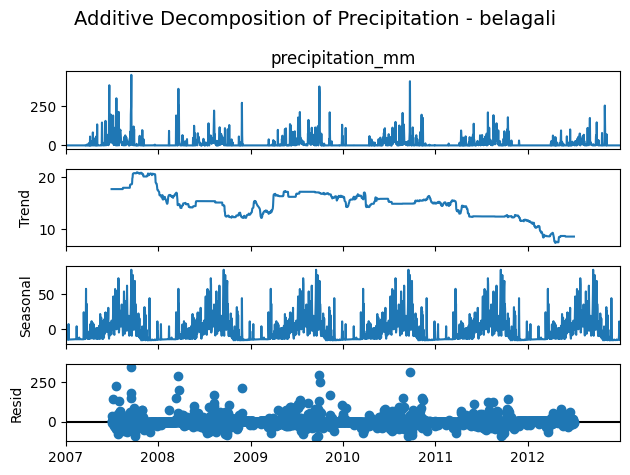

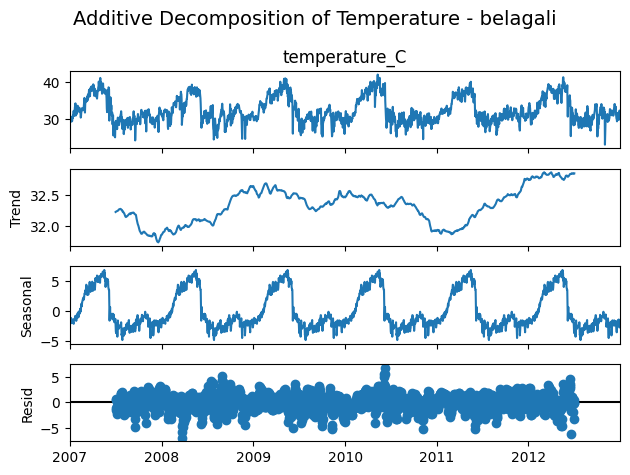

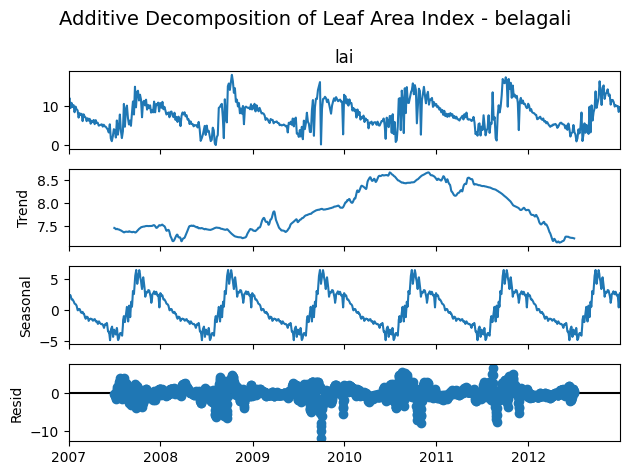

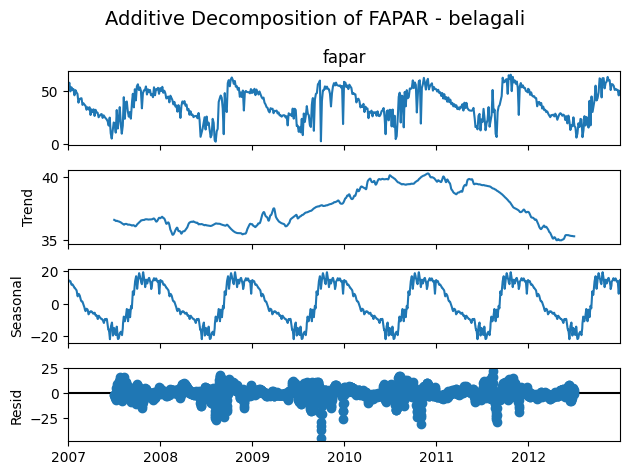

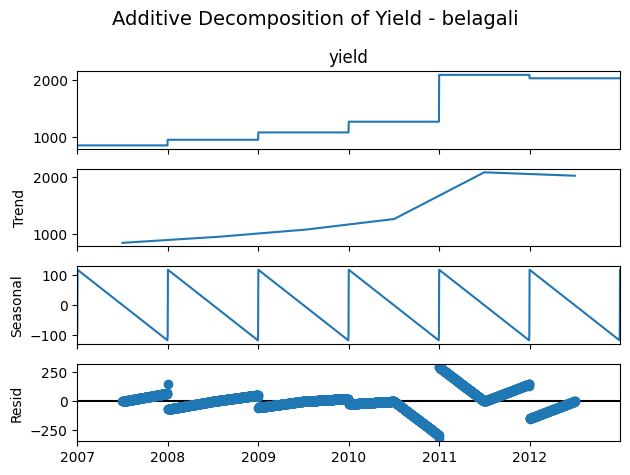

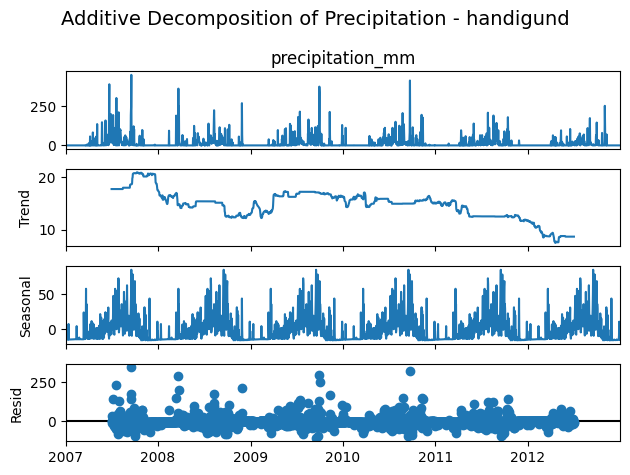

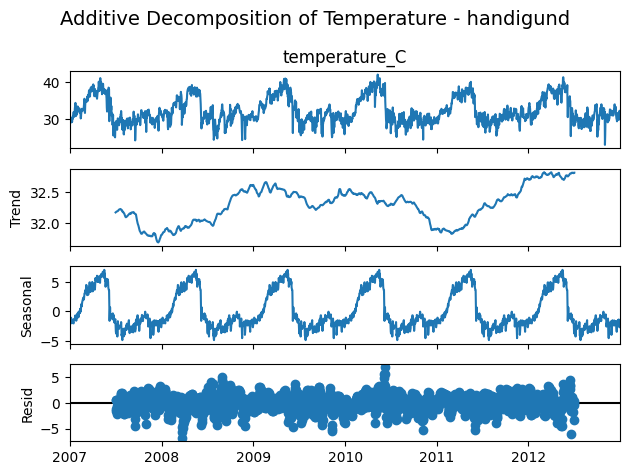

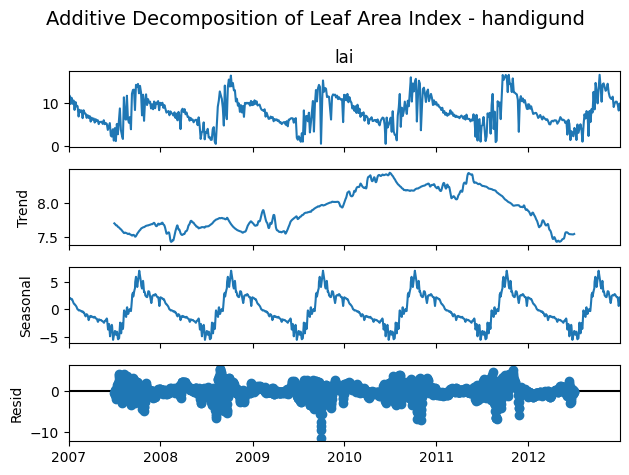

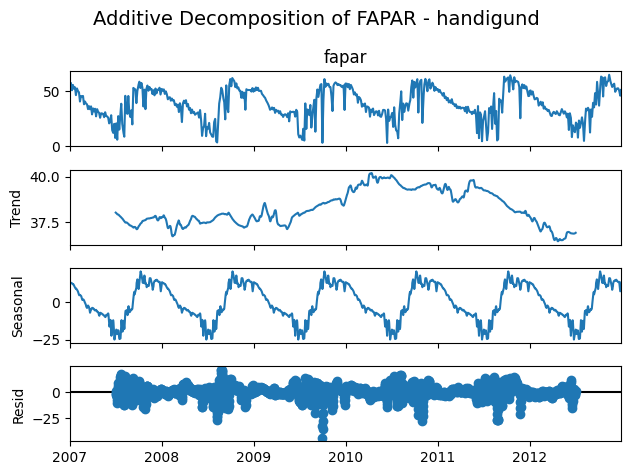

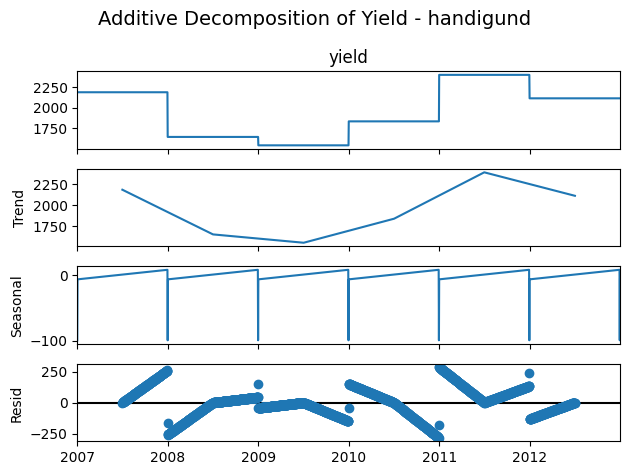

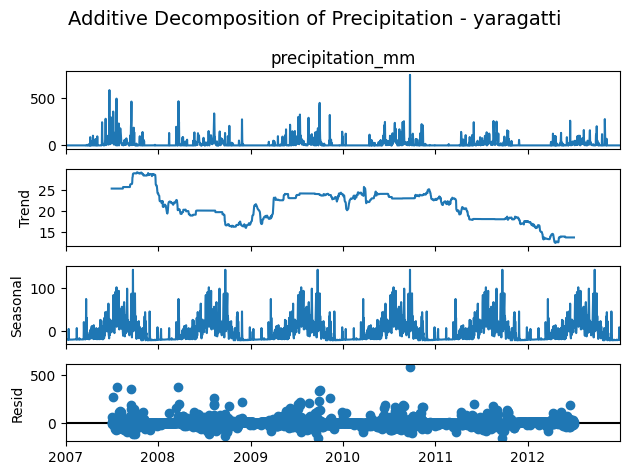

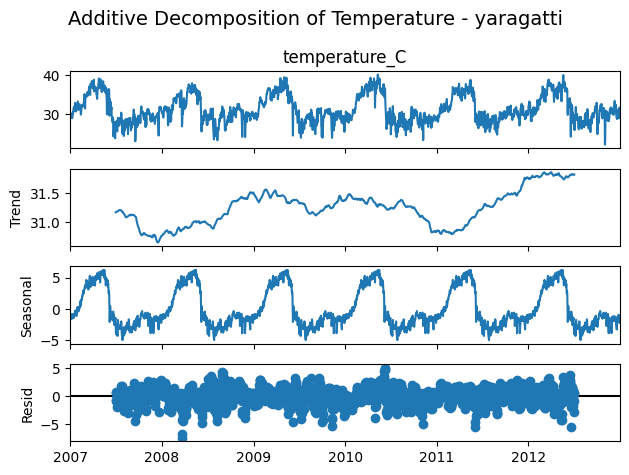

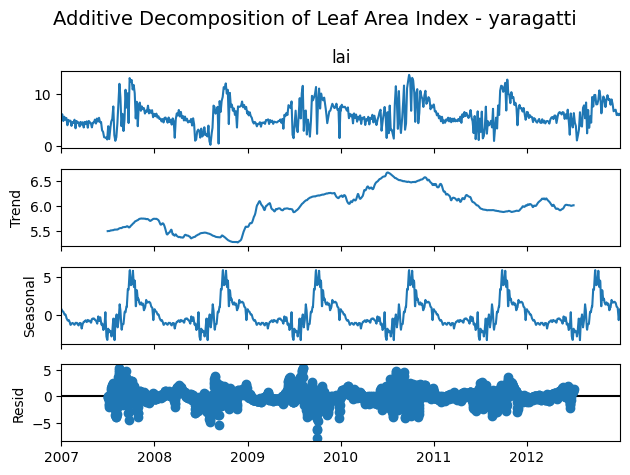

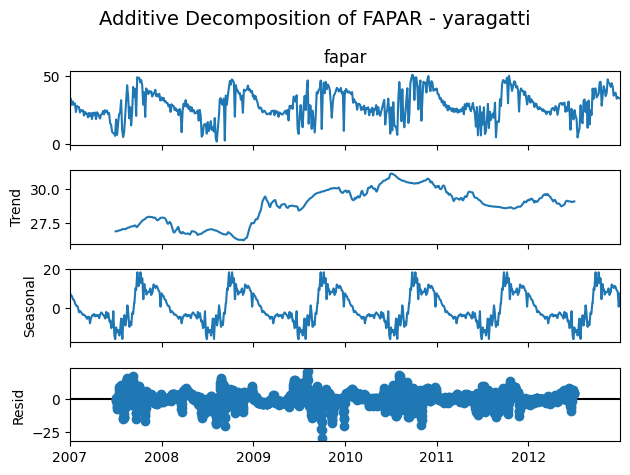

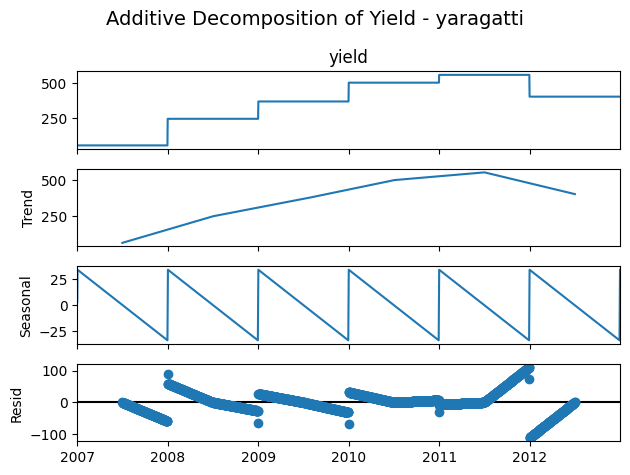

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decompose each variable for each village
for village in df['village'].unique():
    village_df = df[df['village'] == village].copy()

    # Decompose Precipitation
    try:
        result_precip = seasonal_decompose(village_df['precipitation_mm'], model='additive', period=365)
        result_precip.plot()
        plt.suptitle(f"Additive Decomposition of Precipitation - {village}", fontsize=14)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Could not decompose precipitation for {village}: {e}")

    # Decompose Temperature
    try:
        result_temp = seasonal_decompose(village_df['temperature_C'], model='additive', period=365)
        result_temp.plot()
        plt.suptitle(f"Additive Decomposition of Temperature - {village}", fontsize=14)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Could not decompose temperature for {village}: {e}")

        # Decompose lai
    try:
        result_temp = seasonal_decompose(village_df['lai'], model='additive', period=365)
        result_temp.plot()
        plt.suptitle(f"Additive Decomposition of Leaf Area Index - {village}", fontsize=14)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Could not decompose temperature for {village}: {e}")

        # Decompose fapar
    try:
        result_temp = seasonal_decompose(village_df['fapar'], model='additive', period=365)
        result_temp.plot()
        plt.suptitle(f"Additive Decomposition of FAPAR - {village}", fontsize=14)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Could not decompose temperature for {village}: {e}")



    # Decompose Yield
    try:
        result_yield = seasonal_decompose(village_df['yield'], model='additive', period=365)
        result_yield.plot()
        plt.suptitle(f"Additive Decomposition of Yield - {village}", fontsize=14)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Could not decompose yield for {village}: {e}")

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Function to perform ADF test and print results
def adf_test(series, name):
    result = adfuller(series.dropna())
    print(f'{name}:')
    print(f'  ADF Statistic: {result[0]:.4f}')
    print(f'  p-value: {result[1]:.4f}')
    print(f'  Critical Values:')
    for key, value in result[4].items():
        print(f'    {key}: {value:.4f}')
    if result[1] <= 0.05:
        print('  Result: Stationary')
    else:
        print('  Result: Non-stationary')
    print("-" * 30)

# Perform ADF test for each variable in each village
for village in df['village'].unique():
    village_df = df[df['village'] == village].copy()
    print(f"Stationarity Tests for {village}:")
    adf_test(village_df['precipitation_mm'], 'Precipitation')
    adf_test(village_df['temperature_C'], 'Temperature')
    adf_test(village_df['lai'], 'LAI')
    adf_test(village_df['fapar'], 'FAPAR')
    adf_test(village_df['yield'], 'Yield')
    print("=" * 50)

Stationarity Tests for mahalingpur:
Precipitation:
  ADF Statistic: -9.9352
  p-value: 0.0000
  Critical Values:
    1%: -3.4334
    5%: -2.8629
    10%: -2.5675
  Result: Stationary
------------------------------
Temperature:
  ADF Statistic: -4.9090
  p-value: 0.0000
  Critical Values:
    1%: -3.4333
    5%: -2.8629
    10%: -2.5675
  Result: Stationary
------------------------------
LAI:
  ADF Statistic: -4.4369
  p-value: 0.0003
  Critical Values:
    1%: -3.4334
    5%: -2.8629
    10%: -2.5675
  Result: Stationary
------------------------------
FAPAR:
  ADF Statistic: -3.5251
  p-value: 0.0074
  Critical Values:
    1%: -3.4334
    5%: -2.8629
    10%: -2.5675
  Result: Stationary
------------------------------
Yield:
  ADF Statistic: -1.0599
  p-value: 0.7308
  Critical Values:
    1%: -3.4333
    5%: -2.8629
    10%: -2.5675
  Result: Non-stationary
------------------------------
Stationarity Tests for dhawaleshwar:
Precipitation:
  ADF Statistic: -10.4903
  p-value: 0.0000
  

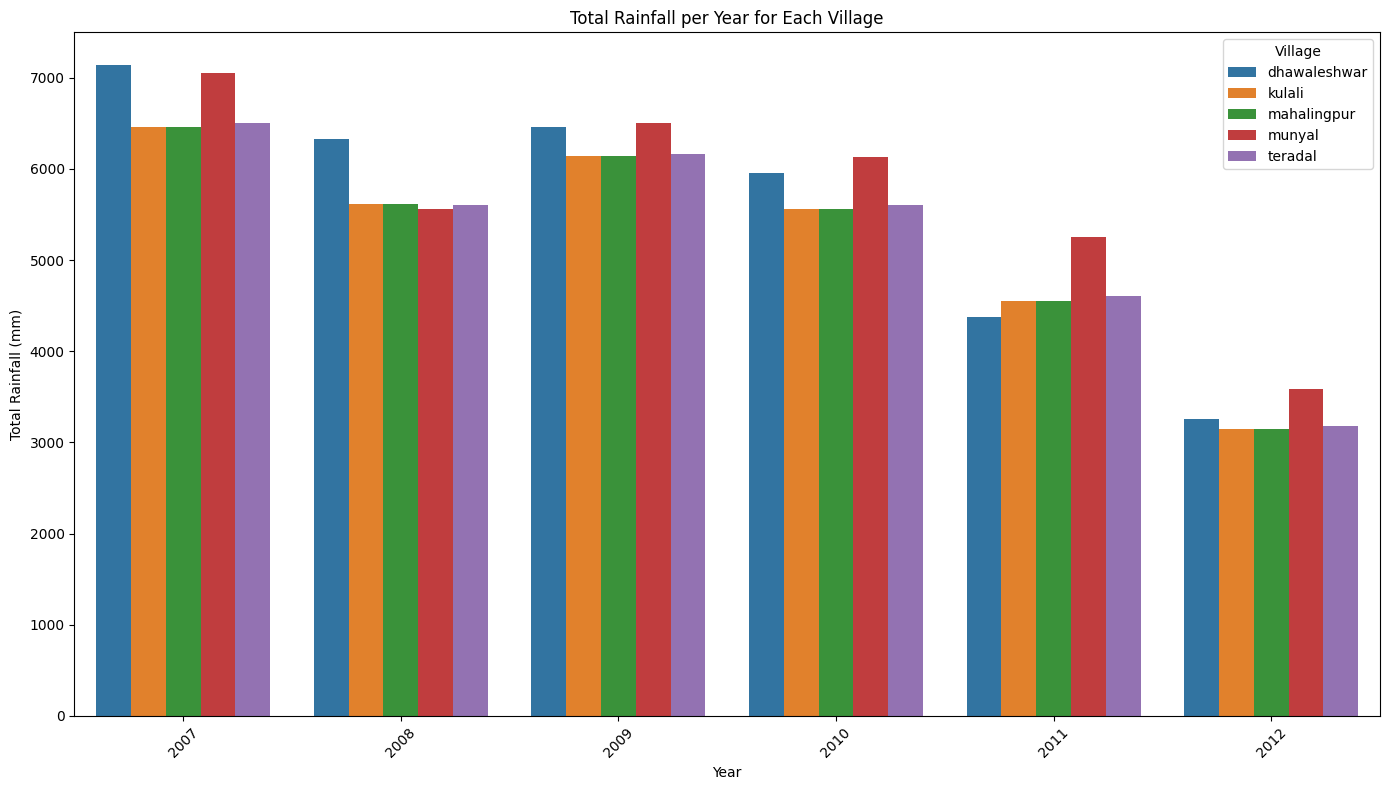

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

rainfall_by_year_village = df.groupby(['village', 'year'])['precipitation_mm'].sum().reset_index()

# Step 7: Plot total rainfall per year for each village
plt.figure(figsize=(14, 8))
sns.barplot(data=rainfall_by_year_village, x='year', y='precipitation_mm', hue='village')
plt.title('Total Rainfall per Year for Each Village')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')
plt.legend(title='Village')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

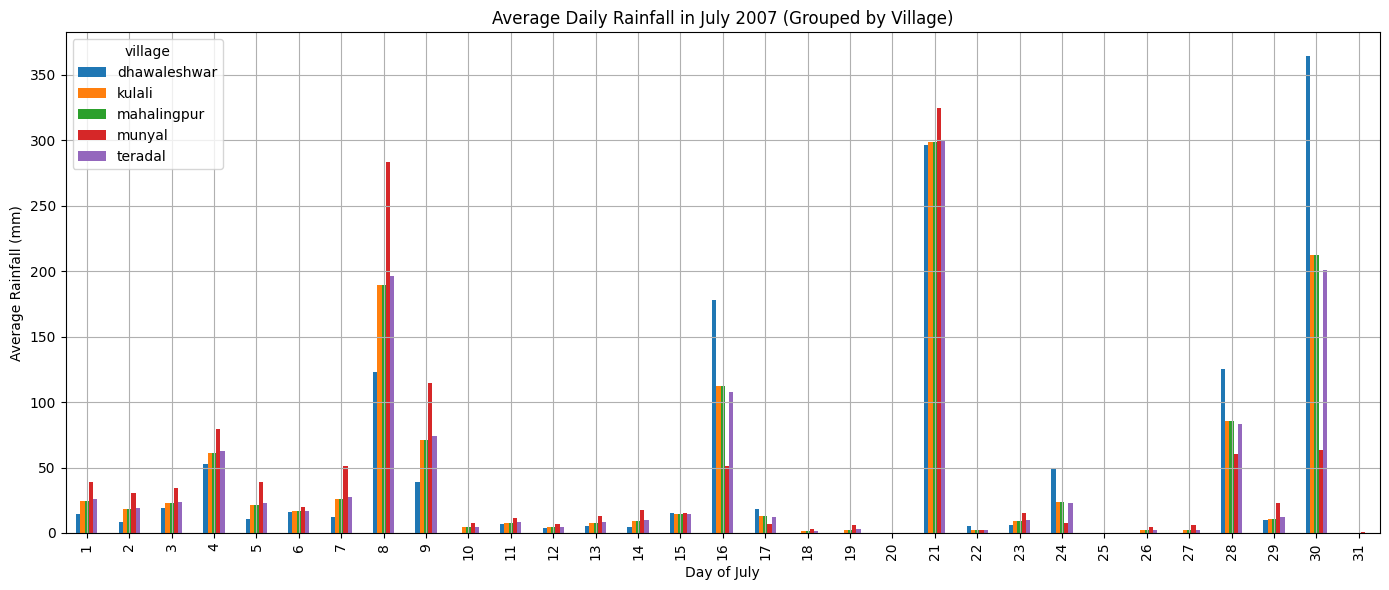

In [ ]:
# Extract year, month, and day
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Filter for July 2007
july_data = df[(df['month'] == 7) & (df['year'] == 2007)]

# Pivot: average rainfall per day per village
pivot = july_data.pivot_table(values='precipitation_mm', index='day', columns='village', aggfunc='mean')

# Plot
pivot.plot(kind='bar', figsize=(14, 6))
plt.title("Average Daily Rainfall in July 2007 (Grouped by Village)")
plt.xlabel("Day of July")
plt.ylabel("Average Rainfall (mm)")
plt.grid(True)
plt.tight_layout()
plt.show()



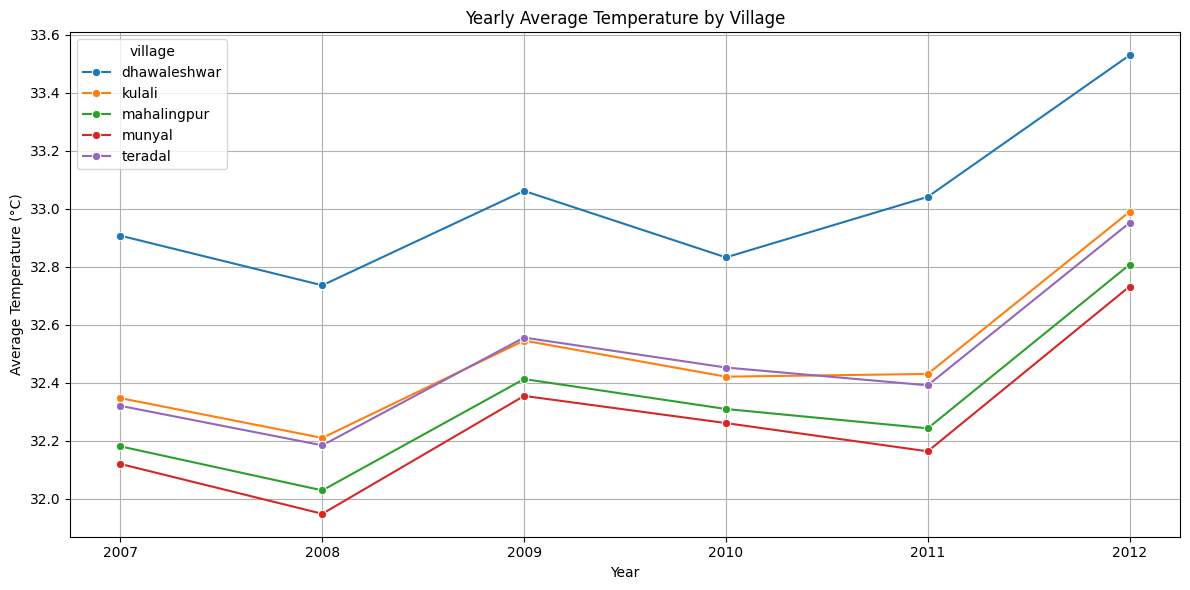

In [ ]:
# Assuming your DataFrame is named 'df'
yearly_temp1 = df.groupby(['village', 'year'])['temperature_C'].mean().reset_index()
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.lineplot(data=yearly_temp1, x='year', y='temperature_C', hue='village', marker='o')
plt.title("Yearly Average Temperature by Village")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()